# Q1

In [ ]:
Implement a meta learning workflow using artificial neural network for a categorical
target variable.

## Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dataset = pd.read_csv("datasets/mushrooms.csv/https://colab.research.google.com/drive/1Xkf8JtG4HH1aoZvKFNNPJsSdpodvEDd3?usp=sharing")
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# one hot encoding
for column_name in dataset.columns:
    encoded_df = pd.get_dummies(dataset[column_name], drop_first=True)
    encoded_df.columns = [ f"{column_name}_{i}" for i in encoded_df.columns]
    encoded_df.columns
    dataset.drop([column_name], axis=1, inplace=True)
    dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
dataset.columns

Index(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-colo

In [ ]:
x = dataset.drop(["class_p"], axis=1)
y = dataset["class_p"]

In [ ]:
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: uint8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5832,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
601,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1601,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4941,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7492,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
380,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3641,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
273,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1029,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
684,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_train.head()

5832    1
601     0
1601    0
4941    1
7492    1
Name: class_p, dtype: uint8

In [ ]:
y_test.head()

380     1
3641    0
273     0
1029    0
684     0
Name: class_p, dtype: uint8

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1061    0]
 [   0  970]]


In [ ]:
accuracy_score(y_test, y_pred)

1.0

## Observation

We use LogisticRegression Model and we have Accuracy score of 1.0 as result.

# Q2

## Implementation

Discuss the overhead caused in computation when a machine learning model is required
to perform a prediction task using 1, 20, 000 data points and 15 features.

Computation overhead when training a machine learning depends on various factors like algorithm, optimizer, hardware(CPU/GPU).

In [ ]:
def gradient_descent(w, b , grad_w, grad_b, learning_rate):
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    return w, b

Gradient Descent:

In [ ]:
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, caches, parameters)
    # Update parameters
    parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m

Stochastic Gradient Descent:

In [ ]:
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    cost_total = 0
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost_total += compute_cost(a, Y[:,j])  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters
        parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m

## Observation

Gradient Descent:
    It will compute loss for all examples to take each step hence it will take more memory to take single step.

Stochastic Gradient Descent:
    It will compute loss for chunk of example to take each step hence it will take less memory to take single step. since it take chunk of example it will oscillate while converging.

# Q3

# 3. Is neural network a black box model? If no, justify. If yes, discuss the parameters required for the design of a neural network when a data scientist is required to analyse the continuous target variable in a dataset.

Yes, Neural Network is a Blackbox model.

## Parameters required for the design of a neural network:
    * No of Hidden layers
    * No of Neuron in Hidden Layer
    * Batchsize
    * Epoch
    * Learning Rate
    * Loss function
    * Optimisation function

## Implementation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging

In [ ]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
celsius = [-40.0, -10, 0, 8, 15, 22, 38]
fahrenheit = [-40.0, 14, 32, 46, 59, 72, 100]

In [ ]:
x = np.array(celsius)
y = np.array(fahrenheit)

In [ ]:
for i,c in enumerate(x):
    print(f"{c} degree celsius = {y[i]} degrees fahrenheit")

-40.0 degree celsius = -40.0 degrees fahrenheit
-10.0 degree celsius = 14.0 degrees fahrenheit
0.0 degree celsius = 32.0 degrees fahrenheit
8.0 degree celsius = 46.0 degrees fahrenheit
15.0 degree celsius = 59.0 degrees fahrenheit
22.0 degree celsius = 72.0 degrees fahrenheit
38.0 degree celsius = 100.0 degrees fahrenheit


In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [ ]:
model.fit(x, y, epochs=1000, verbose=True)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 4036.7869
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 3772.5876
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 3520.1294
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 3279.5972
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 3051.1431
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 2834.8911
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 2630.9272
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 2439.2947
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 2259.9966
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 2092.9863
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 1938.1688
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 1795.3982
Epoch 13/1000


In [ ]:
model.predict([350])

1/1 [==============================] - 0s 74ms/step


array([[661.3022]], dtype=float32)

In [ ]:
def celsiusToFahrenheit(x):
    return x*1.8 +32

In [ ]:
celsiusToFahrenheit(350)

662.0

## Observation

We used single neuron neural network to convert Celsius to Fahrenheit. As we see our prediction is close to the actual result but not exactly equal. Thats because of nature of neural network.

# Q4

## Implementation

In [ ]:
Design a stacking ensemble learning workflow using neural net to predict the customers
planning to churn a Telecommunication service.Report your observation with
exploratory analysis on features, and model evaluation with receiver operating
characteristics. Also, compare the impact on complexity involved in computation
between a black box model and a benchmark model like logistic regression.

In [ ]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from numpy import dstack

from keras import backend as K
from keras.callbacks import EarlyStopping

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [ ]:
os.getcwd()

'D:\\jupyterlab\\ca1'

In [ ]:
df = pd.read_csv("datasets/churn.csv")
df = df[df.TotalCharges != 0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
categorical_columns = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "Churn"
]

In [ ]:
for column in categorical_columns:
    ohe = pd.get_dummies(df[column], drop_first=True)
    ohe.columns = [f"{column}_{i}" for i in ohe.columns]
    df = pd.concat([df, ohe], axis=1)
    df = df.drop([column], axis=1)

df = df.drop(["customerID"], axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,18.80,18.80,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,1,18.85,18.85,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,18.85,18.85,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
3,0,1,18.90,18.90,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,19.00,19.00,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop(["Churn_Yes"], axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,18.80,18.80,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,1,18.85,18.85,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,1,18.85,18.85,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
3,0,1,18.90,18.90,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,1,19.00,19.00,0,1,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
Y = df["Churn_Yes"]
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn_Yes, dtype: uint8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.00547264, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.00597015, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00597015, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.98756219, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.99054726, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_final = pd.DataFrame(columns = X.columns,data = X_scaled)
X_final.head(20)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.005473,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.005970,0.000006,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.005970,0.000006,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.006468,0.000012,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.007463,0.000023,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.007960,0.000029,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.008458,0.000035,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.008458,0.000035,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,0.008458,0.000035,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.008955,0.000040,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size=.3, random_state=101)

In [ ]:
X_train.shape

(4922, 30)

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model1 = Sequential()
model1.add(Dense(50, activation="relu", input_dim=30))
model1.add(Dense(25, activation="relu",))
model1.add(Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=[f1_m])
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4784 - f1_m: 0.2177 - val_loss: 0.4501 - val_f1_m: 0.4648
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4293 - f1_m: 0.5456 - val_loss: 0.4362 - val_f1_m: 0.5243
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4205 - f1_m: 0.5589 - val_loss: 0.4308 - val_f1_m: 0.5629
Epoch 4/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4155 - f1_m: 0.5657 - val_loss: 0.4276 - val_f1_m: 0.5516
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4112 - f1_m: 0.5750 - val_loss: 0.4323 - val_f1_m: 0.5287
Epoch 6/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4090 - f1_m: 0.5825 - val_loss: 0.4272 - val_f1_m: 0.5583
Epoch 7/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4064 - f1_m: 0.5864 - val_loss: 0.4267 - val_f1_m: 0.5589
Epoch 8/100
154/154 [==============================] - 

In [ ]:
model2 = Sequential()
model2.add(Dense(25,activation = 'relu',input_dim = 30))
model2.add(Dense(25,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history2 = model2.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5135 - f1_m: 0.1047 - val_loss: 0.4613 - val_f1_m: 0.4203
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4362 - f1_m: 0.5347 - val_loss: 0.4456 - val_f1_m: 0.4893
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4264 - f1_m: 0.5724 - val_loss: 0.4295 - val_f1_m: 0.5719
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4210 - f1_m: 0.5742 - val_loss: 0.4274 - val_f1_m: 0.5762
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4179 - f1_m: 0.5777 - val_loss: 0.4279 - val_f1_m: 0.5531
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4143 - f1_m: 0.5756 - val_loss: 0.4230 - val_f1_m: 0.5767
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.4124 - f1_m: 0.5815 - val_loss: 0.4226 - val_f1_m: 0.5759
Epoch 8/100
154/154 [==============================] - 

In [ ]:
model3 = Sequential()
model3.add(Dense(128,activation = 'relu',input_dim = 30))
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(32,activation = 'relu'))
model3.add(Dense(16,activation = 'relu'))
model3.add(Dense(8,activation = 'relu'))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history3 = model3.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
154/154 [==============================] - 2s 7ms/step - loss: 0.4941 - f1_m: 0.2441 - val_loss: 0.4417 - val_f1_m: 0.5180
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4232 - f1_m: 0.5450 - val_loss: 0.4286 - val_f1_m: 0.5501
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4174 - f1_m: 0.5479 - val_loss: 0.4340 - val_f1_m: 0.5050
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4114 - f1_m: 0.5601 - val_loss: 0.4303 - val_f1_m: 0.4990
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4086 - f1_m: 0.5645 - val_loss: 0.4280 - val_f1_m: 0.5690
Epoch 6/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4044 - f1_m: 0.5626 - val_loss: 0.4294 - val_f1_m: 0.5739
Epoch 7/100
154/154 [==============================] - 1s 7ms/step - loss: 0.4015 - f1_m: 0.5684 - val_loss: 0.4295 - val_f1_m: 0.5713
Epoch 8/100
154/154 [==============================] - 

In [ ]:
model4 = Sequential()
model4.add(Dense(32,activation = 'relu', input_dim= 30))
model4.add(Dense(16,activation = 'relu'))
model4.add(Dense(8,activation = 'relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history4 = model4.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
154/154 [==============================] - 1s 6ms/step - loss: 0.5026 - f1_m: 0.0429 - val_loss: 0.4621 - val_f1_m: 0.2943
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4429 - f1_m: 0.4994 - val_loss: 0.4381 - val_f1_m: 0.6035
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4286 - f1_m: 0.5620 - val_loss: 0.4322 - val_f1_m: 0.5664
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4229 - f1_m: 0.5589 - val_loss: 0.4269 - val_f1_m: 0.5870
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4186 - f1_m: 0.5860 - val_loss: 0.4315 - val_f1_m: 0.5291
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4161 - f1_m: 0.5724 - val_loss: 0.4257 - val_f1_m: 0.5799
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4121 - f1_m: 0.5778 - val_loss: 0.4250 - val_f1_m: 0.5692
Epoch 8/100
154/154 [==============================] - 

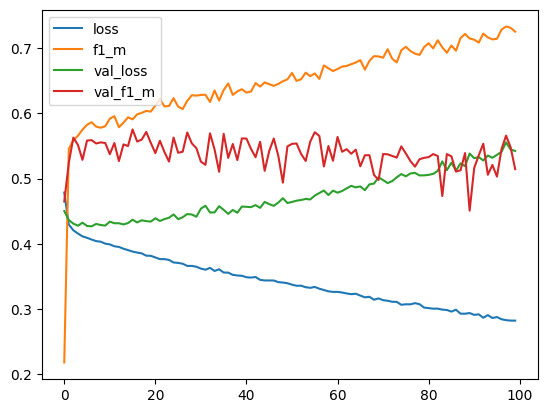

In [ ]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["f1_m"])
plt.plot(history1.history["val_loss"])
plt.plot(history1.history["val_f1_m"])
plt.legend(["loss", "f1_m", "val_loss", "val_f1_m"])
plt.show()

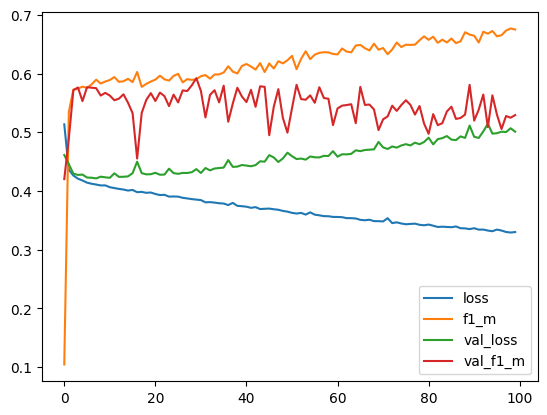

In [ ]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["f1_m"])
plt.plot(history2.history["val_loss"])
plt.plot(history2.history["val_f1_m"])
plt.legend(["loss", "f1_m", "val_loss", "val_f1_m"])
plt.show()

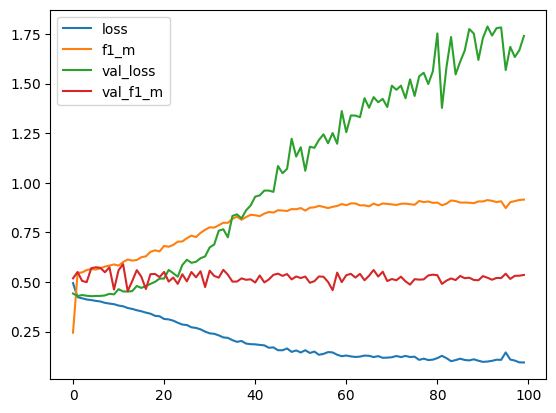

In [ ]:
plt.plot(history3.history["loss"])
plt.plot(history3.history["f1_m"])
plt.plot(history3.history["val_loss"])
plt.plot(history3.history["val_f1_m"])
plt.legend(["loss", "f1_m", "val_loss", "val_f1_m"])
plt.show()

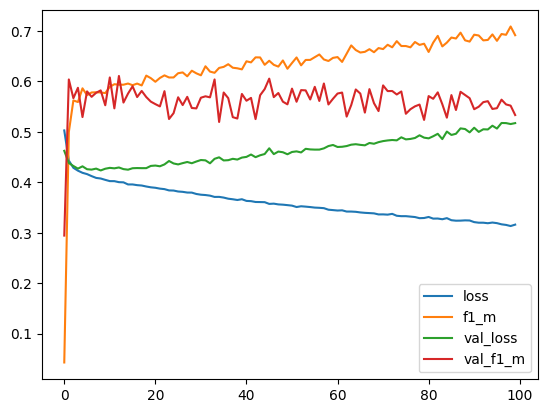

In [ ]:
plt.plot(history4.history["loss"])
plt.plot(history4.history["f1_m"])
plt.plot(history4.history["val_loss"])
plt.plot(history4.history["val_f1_m"])
plt.legend(["loss", "f1_m", "val_loss", "val_f1_m"])
plt.show()

In [ ]:
model1.save("m1.h5")
model2.save("m2.h5")
model3.save("m3.h5")
model4.save("m4.h5")

In [ ]:
dependencies= {
    "f1_m":f1_m
}

In [ ]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'm' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=dependencies)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded m1.h5
>loaded m2.h5
>loaded m3.h5
>loaded m4.h5
Loaded 4 models


In [ ]:
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat #
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression() #meta learner
	model.fit(stackedX, inputy)
	return model

In [ ]:
s_model = fit_stacked_model(members, X_test, y_test)

In [ ]:
def stacked_prediction(members, model, inputX):
    stx = stacked_dataset(members, inputX)
    yhat = model.predict(stx)
    return yhat

In [ ]:
yhat = stacked_prediction(members, s_model, X_test)
score = f1_m(y_test/1.0, yhat/1.0)
score

<tf.Tensor: shape=(), dtype=float64, numpy=0.5357142369968865>

## Observation

We can clearly see that F1 score is improved after we using Stacked Model

# Q5

In [ ]:
Demonstrate the effect on variations of hyper parameters in the construction and training
of a two layered shallow network. Also, discuss the effect of loss on increased learningrate and size of hidden layers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

In [ ]:
seed = 7
np.random.seed(seed)

In [ ]:
dataset = pd.read_csv("datasets/pima-indians-diabetes.csv")

In [ ]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [ ]:
model1 = Sequential()
model1.add(Dense(16, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

history1 = model1.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 1s 8ms/step - loss: 0.7495 - accuracy: 0.6140 - val_loss: 0.6319 - val_accuracy: 0.6732
Epoch 2/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6413 - val_loss: 0.6331 - val_accuracy: 0.6732
Epoch 3/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.6413 - val_loss: 0.6349 - val_accuracy: 0.6732
Epoch 4/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6413 - val_loss: 0.6437 - val_accuracy: 0.6732
Epoch 5/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6413 - val_loss: 0.6395 - val_accuracy: 0.6732
Epoch 6/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.6413 - val_loss: 0.6326 - val_accuracy: 0.6732
Epoch 7/150
52/52 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.6413 - val_loss: 0.6319 - val_accuracy: 0.6732
Epoch 8/150
5

In [ ]:
model2 = Sequential()
model2.add(Dense(16, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

history2 = model2.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 1s 8ms/step - loss: 3.4797 - accuracy: 0.5400 - val_loss: 1.8935 - val_accuracy: 0.6850
Epoch 2/150
52/52 [==============================] - 0s 5ms/step - loss: 1.5504 - accuracy: 0.5906 - val_loss: 1.3202 - val_accuracy: 0.4252
Epoch 3/150
52/52 [==============================] - 0s 5ms/step - loss: 0.9887 - accuracy: 0.6004 - val_loss: 1.5562 - val_accuracy: 0.5630
Epoch 4/150
52/52 [==============================] - 0s 5ms/step - loss: 0.9468 - accuracy: 0.6335 - val_loss: 1.4433 - val_accuracy: 0.5827
Epoch 5/150
52/52 [==============================] - 0s 5ms/step - loss: 0.7661 - accuracy: 0.6745 - val_loss: 0.6481 - val_accuracy: 0.6969
Epoch 6/150
52/52 [==============================] - 0s 5ms/step - loss: 1.0097 - accuracy: 0.6316 - val_loss: 0.7068 - val_accuracy: 0.6417
Epoch 7/150
52/52 [==============================] - 0s 5ms/step - loss: 0.7223 - accuracy: 0.6433 - val_loss: 0.6257 - val_accuracy: 0.6890
Epoch 8/150
5

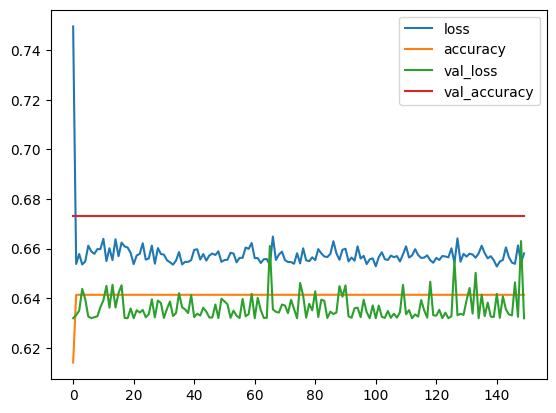

In [ ]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_loss"])
plt.plot(history1.history["val_accuracy"])
plt.legend(["loss", "accuracy", "val_loss", "val_accuracy"])
plt.show()

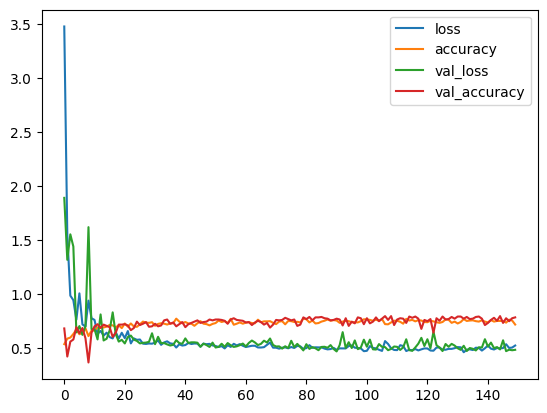

In [ ]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_loss"])
plt.plot(history2.history["val_accuracy"])
plt.legend(["loss", "accuracy", "val_loss", "val_accuracy"])
plt.show()

## Observation

Even comparatively small network having a small learning rate can perform better.

In [ ]:
import keras as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten, LSTM
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

1.Design a shallow neural network with one layer for the prediction task on student admissions to graduate school at University of California, Los Angles (UCLA) based on three criteria Compare the performance of the network with a deep neural network. Report your observation with comparison on accuracy metrics.


In [ ]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

In [ ]:
data['GRE Score'] = data['GRE Score'].astype("float32") / 340.0
data['TOEFL Score'] = data['TOEFL Score'].astype("float32") / 120.0
data["CGPA"] = data["CGPA"].astype("float32") / 10.0

data.head()

In [ ]:
ohe = pd.get_dummies(data["University Rating"], prefix="ur")
data = pd.concat([data, ohe], axis=1)
data = data.drop(["University Rating", "Serial No.", 'SOP', 'LOR ','Research' ], axis=1)
data

In [ ]:
X = data.drop(["Chance of Admit "], axis=1)
X[:5]

In [ ]:
y = data["Chance of Admit "]
y[:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=6)

In [ ]:
epochs = 50

In [ ]:
shallow_model = Sequential()

shallow_model.add(Dense(16, activation="relu", input_shape=[8]))
shallow_model.add(Dense(8, activation="relu"))
shallow_model.add(Dense(1, activation="sigmoid"))

shallow_model.compile(loss="mean_squared_error", optimizer="adam", metrics=[K.metrics.RootMeanSquaredError(name='rmse')])

shallow_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

In [ ]:
dnn_model = Sequential()

dnn_model.add(Dense(16, activation="relu", input_shape=[8]))
dnn_model.add(Dense(8, activation="relu"))
dnn_model.add(Dense(4, activation="relu"))
dnn_model.add(Dense(1, activation="sigmoid"))

dnn_model.compile(loss="mean_squared_error", optimizer="adam", metrics=[K.metrics.RootMeanSquaredError(name='rmse')])
dnn_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

2.The Keras API has the Canadian Institute for Advanced Research (CIFAR) dataset with
10 classes of images. Design a Convolutional neural network (CNN) to read 32x32 pixel
square. Create a pattern of convolutional, dropout, convolutional, and Max-pooling.
Repeat the pattern three times with 32, 64, and 128 feature maps respectively with 20%
probability of dropout for regularization. Finally, translate larger number of feature maps
to class values using additional and dense layers of 1024 and 512 neurons respectively.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.2))
model.add(Convolution2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.2))
model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
sgd = SGD(learning_rate=0.001, momentum=.9)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=30)

3.Discuss the sequence processing mechanism of recurrent neural network (RNN)
architecture. Fit a long short term memory (LSTM) network that has a visible layer with
one neuron, hidden layer with 4 LSTM block of neurons, and an output layer for
predicting the next time step*

. Compare the performance of LSTM with a baseline

multilayer perceptron.

In [ ]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
df.head()

In [ ]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])
df['date_time']=pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)
df=df.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)

In [ ]:
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.date_time.min())
print('The time series ends on: ', df.date_time.max())

In [ ]:
dataset = df.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
aa = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
Q1.Define Meta learner. Discuss the role of activation functions in performing classification and regression tasks in the design of neural networks. Implement a baseline neural network for modelling a categorical target variable. Report your observation on model parameters and hyper-parameters.

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

#load the dataset
df=pd.read_csv('E:\\py\\diabetes.csv')
df

In [ ]:
# Extract the features and target variable
features = df.drop(columns=['Outcome'])
target = df['Outcome']


In [ ]:
# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Define the model architecture
def create_model(num_layers=2, num_neurons=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation=activation))
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Define hyper-parameters for grid search
num_layers = [1, 2, 3]
num_neurons = [32, 64, 128]
activation = ['relu', 'sigmoid']
optimizer = ['adam', 'sgd']

In [ ]:
# Use KerasClassifier and GridSearchCV for hyper-parameter tuning
model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = dict(num_layers=num_layers, num_neurons=num_neurons, activation=activation, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Print best hyper-parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

2.Illustrate the design of an adaptive linear threshold unit for realization of OR logic. Initially, all weights are assumed to be small random values, say 0.1, and set learning rate to 0.1. Write the input variables, truth values, and delta update rule for updating weights and biases with least squared error value 2. The weights are updated until the total error is greater than the least squared error. Derive the computation of the network

In [ ]:
import numpy as np

# Input patterns
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Target values
Y = np.array([0, 1, 1, 1])
# Initialize weights and bias
w = np.array([0.1, 0.1])
b = 0.1

# Learning rate
eta = 0.1
# Least squared error
least_squared_error = 2
# Total error
total_error = least_squared_error + 1

# Epochs
epochs = 0



In [ ]:
# Train the model until total error is greater than least squared error
while total_error > least_squared_error:
    total_error = 0

    # Loop through each input pattern
    for i in range(len(X)):
        # Compute net input
        net = np.dot(w, X[i]) + b

        # Compute output
        output = 1 if net >= 0 else 0

        # Compute error
        error = Y[i] - output

        # Update weights and bias
        delta_w = eta * error * X[i]
        delta_b = eta * error
        w += delta_w
        b += delta_b

        # Compute total error
        total_error += error ** 2

    epochs += 1

In [ ]:
# Print results
print("Weights:", w)
print("Bias:", b)
print("Epochs:", epochs)

In [ ]:
Adaline (Adaptive Linear Neuron) is a single-layer neural network with a linear activation function that uses the least mean squares (LMS) algorithm to adjust the weights and bias of the neuron. Adaline is a special case of the delta rule, where the activation function is linear. Adaline can be used for both classification and regression tasks.

Madaline (Multiple Adaline) is a multi-layer neural network that consists of multiple Adaline units. Each Adaline unit is responsible for learning a specific part of the input space, and the output of the network is the combination of the outputs of all Adaline units. Madaline is used for classification tasks, where the input space is partitioned into multiple regions, and each Adaline unit learns to classify a particular region. The weights of each Adaline unit are adjusted independently using the LMS algorithm.

4.Develop a baseline multiplayer neural network to recognize the handwritten digits from MNIST database. Load the dataset using Keras API. Design a Large Convolutional neural network (CNN) to read 28x28 pixels square. Extract three different patterns say 32, 64, and 128 feature maps using appropriate filter sizes, pooling of size 2x2 with 20% dropout for regularization. Classify the digits using a fully connected layer of 128 neurons. Report your observation on accuracy in classifying the digits with comparison on errors between the baseline network, a simple CNN and a larger CNN model.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Define the baseline model architecture
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the baseline model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the baseline model
baseline_history = baseline_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
# Evaluate the baseline model on the test data
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)
print('Baseline test accuracy:', baseline_test_acc)


In [ ]:
# Define the simple CNN model architecture
simple_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the simple CNN model
simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the simple CNN model
simple_cnn_history = simple_cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the simple CNN model on the test data
simple_cnn_test_loss, simple_cnn_test_acc = simple_cnn_model.evaluate(X_test, y_test)
print('Simple CNN test accuracy:', simple_cnn_test_acc)

In [ ]:
# Define the larger CNN model architecture
larger_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the larger CNN model
larger_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the larger CNN model
larger_cnn_history = larger_cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
# Evaluate the larger CNN model on the test data
larger_cnn_test_loss, larger_cnn_test_acc = larger_cnn_model.evaluate(X_test, y_test)
print('Larger CNN test accuracy:', larger_cnn_test_acc)

5.Design and implement a Long Short Time Memory (LSTM) network with 32 units and  single output neurons to learn the following tasks. Fit the model over 300 epochs with  unit batch size and necessary optimizer. Report your observation on output, model  accuracy and loss.

1. Prediction of the next character in the alphabet given the context of just one character.

2. Learn a random sub-sequence of the alphabet to predict the next letter in the  alphabet.

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []


In [ ]:
#generating a dataset of input-output pairs using randomly selected sequences from the alphabet
for i in range(num_inputs):
    start = numpy.random.randint(len(alphabet)-2)
    end = numpy.random.randint(start, min(start+max_len,len(alphabet)-1))
    sequence_in = alphabet[start:end+1]
    sequence_out = alphabet[end + 1]
    dataX.append([char_to_int[char] for char in sequence_in])
    dataY.append(char_to_int[sequence_out])
    print(sequence_in,'->', sequence_out) #printing out each input-output pair

In [ ]:
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
X = numpy.reshape(X, (X.shape[0], max_len, 1))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
# create and fit the model
batch_size = 1
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(y.shape[1], activation= 'softmax' ))
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=batch_size, verbose=2)

In [ ]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# demonstrate some model predictions
for i in range(20):
    pattern_index = numpy.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = pad_sequences([pattern], maxlen=max_len, dtype= 'float32' )
    x = numpy.reshape(x, (1, max_len, 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

3. Download a free corpus of size 100 KB on any topic of your choice and save it  as “Topic.txt”. Design a LSTM recurrent neural network model for generating  text from the file Topic.txt. Create checkpoints for storing the weights with  smallest loss. Save the model as an .hdf5 file. Use the saved model to generate  new text sequences. Report your observation on model accuracy and discuss the  correctness of the generated text sequence.

In [ ]:
import sys
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import os
print('Get current working directory : ', os.getcwd())

In [ ]:
# load ascii text and covert to lowercase
filename = "wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

In [ ]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
# fit the model
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-20-2.0943.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

In [ ]:
# generate characters
for i in range(1000):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")